# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Magic matplotlib command to have plots shown in the notebook
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called `chipo`.

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep='\t')

### Step 4. Display the first 10 entries.

In [3]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a barplot of the top 5 items ordered

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Chicken Bowl'),
  Text(1, 0, 'Chicken Burrito'),
  Text(2, 0, 'Chips and Guacamole'),
  Text(3, 0, 'Steak Burrito'),
  Text(4, 0, 'Canned Soft Drink')])

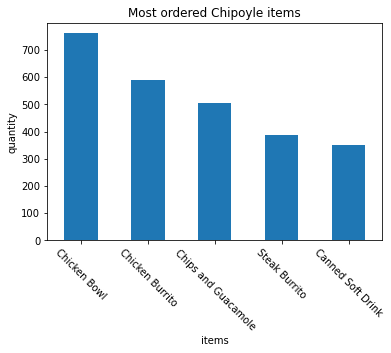

In [4]:
items = chipo.groupby('item_name').quantity.sum().sort_values(ascending=False)[:5]
items
items.plot(kind='bar')
plt.xlabel("items")
plt.ylabel("quantity")
plt.title("Most ordered Chipoyle items")
# Rotate x-labels
plt.xticks(rotation=-45)

### Step 6. Create a scatter plot with the order price as a function of the number of items ordered
#### Hint: Price should be in the Y-axis and Items ordered in the X-axis

In [5]:
chipo.info() # item_price is dtype = object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [6]:
# transform 'item_price' to float
chipo['item_price'] = chipo.item_price.str.slice(1).astype(float) 
chipo.info()
chipo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.7+ KB


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


(0.0, 36.7)

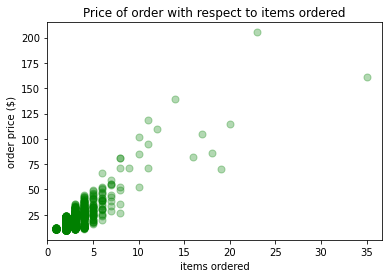

In [7]:
orders = chipo.groupby('order_id').sum()
orders

plt.scatter(x=orders.quantity, y=orders.item_price, s=50, c='green', alpha=.3)

plt.xlabel("items ordered")
plt.ylabel("order price ($)")
plt.title('Price of order with respect to items ordered')
plt.xlim(0)

(0.0, 36.7)

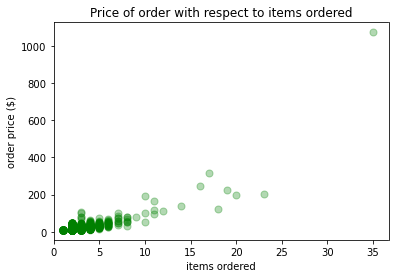

In [11]:
# Create a new variable: quantity per price
chipo['qxp'] = chipo.quantity * chipo.item_price
ordersGood = chipo.groupby('order_id').sum()
ordersGood
plt.scatter(x=ordersGood.quantity, y=ordersGood.qxp, s=50, c='green', alpha=.3)
plt.xlabel("items ordered")
plt.ylabel("order price ($)")
plt.title('Price of order with respect to items ordered')
plt.xlim(0)

### BONUS: Create a question and a graph to answer your own question.

Create a barplot of the top 5 items ordered (the same as the Step 5) but using Seaborn

In [44]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import warnings

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Chicken Bowl'),
  Text(1, 0, 'Chicken Burrito'),
  Text(2, 0, 'Chips and Guacamole'),
  Text(3, 0, 'Steak Burrito'),
  Text(4, 0, 'Canned Soft Drink')])

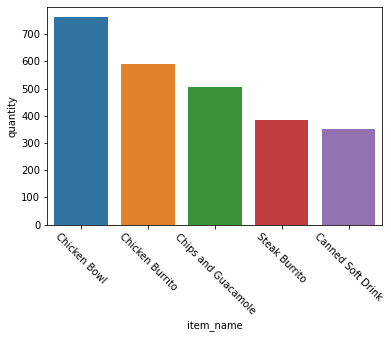

In [70]:
items5 =chipo.groupby('item_name').agg({'quantity':'sum'}).sort_values('quantity', ascending=False)[:5]
items5

items5 = items5.reset_index()  # for working with columns as a DataFrame
items5
# Count Plot (a.k.a. Bar Plot)
sns.barplot(x='item_name', y='quantity', data=items5)
 
# Rotate x-labels
plt.xticks(rotation=-45)